In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 as pretrainedModel , preprocess_input

In [4]:
from tensorflow.keras.layers import Flatten, Dense
from keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

In [14]:
# train_path = '/content/drive/MyDrive/data_set/data/train'
# valid_path = '/content/drive/MyDrive/data_set/data/test'

In [7]:
train_path = 'data/train'
valid_path = 'data/test'

In [13]:
from glob import glob
imageFiles = glob( train_path + '/*/*.jpeg')
validFiles = glob( valid_path + '/*/*.jpeg')
imageFiles

['data/train\\ill\\1.jpeg',
 'data/train\\ill\\2.jpeg',
 'data/train\\ill\\3.jpeg',
 'data/train\\ill\\4.jpeg',
 'data/train\\ill\\5.jpeg',
 'data/train\\ill\\6.jpeg',
 'data/train\\normal\\1.jpeg',
 'data/train\\normal\\2.jpeg',
 'data/train\\normal\\3.jpeg',
 'data/train\\normal\\4.jpeg',
 'data/train\\normal\\5.jpeg',
 'data/train\\normal\\6.jpeg']

In [15]:
import numpy as np
import matplotlib.pyplot as plt

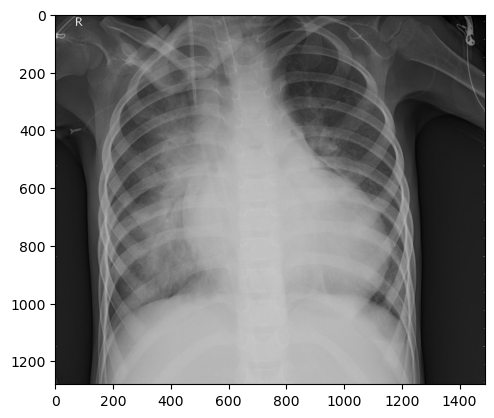

In [17]:
plt.imshow(image.load_img(np.random.choice(imageFiles)))

In [29]:
image_size= [75,75]   # minimum: 75*75

In [31]:
## this cell use in colab environment

# ptm = pretrainedModel(
#     input_shape = image_size + [3],
#     weights= 'imagenet',
#     include_top = False
# )

In [33]:
from tensorflow.keras.applications import InceptionV3  

ptm = InceptionV3(
    input_shape=image_size + [3],
    weights='inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', 
    include_top=False
)

In [35]:
ptm.trainable = False

In [37]:
folders = glob(train_path + '/*')
folders

['data/train\\ill', 'data/train\\normal']

In [39]:
k = len(folders)

In [41]:
x = Flatten()(ptm.output)
x = Dense(k, activation = 'softmax')(x)
model = Model (inputs = ptm.input, outputs = x)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function= preprocess_input
)

In [45]:
batchsize = 128

In [47]:
train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize
)

Found 12 images belonging to 2 classes.


In [49]:
valid_generator = gen.flow_from_directory(
    valid_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize
)

Found 12 images belonging to 2 classes.


In [51]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [53]:
r = model.fit(train_generator, validation_data= valid_generator, epochs =8)

C:\Users\javad\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step - accuracy: 0.4167 - loss: 0.9987 - val_accuracy: 0.5000 - val_loss: 1.1718
Epoch 2/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5833 - loss: 0.7386 - val_accuracy: 0.6667 - val_loss: 0.5083
Epoch 3/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.4769 - val_accuracy: 0.8333 - val_loss: 0.6288
Epoch 4/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7500 - loss: 0.4989 - val_accuracy: 0.5833 - val_loss: 0.8278
Epoch 5/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5833 - loss: 0.6019 - val_accuracy: 0.5833 - val_loss: 0.6943
Epoch 6/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.4878 - val_accuracy: 0.9167 - val_loss: 0.3188
Epoch 7/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.5490 - val_accuracy: 0.4167 - val_loss: 0.9064
Epoch 8/8
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.4612 - val_accuracy: 0.7500 - val_loss: 0.5087


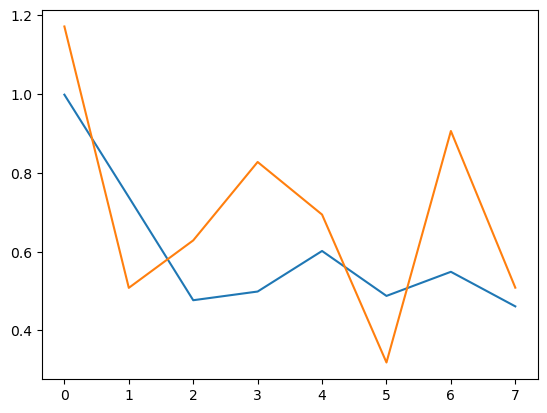

In [54]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

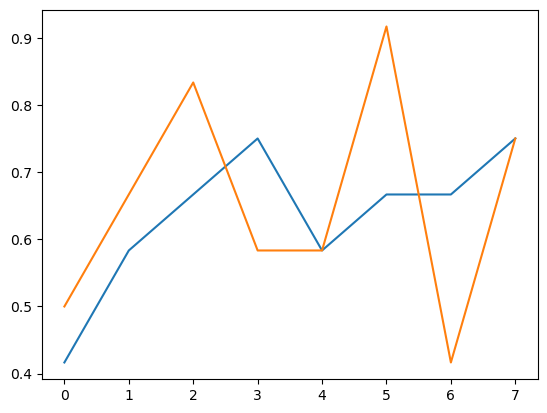

In [55]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')